In [1]:
# Data Analysis for DeepFake Audio Detection
!pip install tqdm IPython scipy

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
from tqdm.notebook import tqdm

# # Set visualization style
# plt.style.use('seaborn')
# sns.set_palette("husl")
# plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
## Load and Analyze Audio Files

In [4]:
def analyze_audio_files(directory):
    """Analyze audio files in directory and return properties DataFrame"""
    audio_properties = []
    
    # Get all wav files
    audio_files = glob.glob(os.path.join(directory, "*.wav"))
    
    for audio_path in tqdm(audio_files, desc="Analyzing files"):
        try:
            # Load audio
            y, sr = librosa.load(audio_path, sr=None)
            
            # Calculate properties
            duration = librosa.get_duration(y=y, sr=sr)
            rms = librosa.feature.rms(y=y).mean()
            zero_crossings = librosa.zero_crossings(y).sum()
            
            # Store properties
            audio_properties.append({
                'filename': os.path.basename(audio_path),
                'duration': duration,
                'sample_rate': sr,
                'num_samples': len(y),
                'rms_energy': rms,
                'zero_crossings': zero_crossings,
                'class': 'genuine' if 'real_audio' in directory else 'deepfake'
            })
            
        except Exception as e:
            print(f"Error processing {audio_path}: {e}")
    
    return pd.DataFrame(audio_properties)

# Analyze both genuine and deepfake directories
genuine_dir = "real_audio"
deepfake_dir = "deepfake_audio"

genuine_df = analyze_audio_files(genuine_dir)
deepfake_df = analyze_audio_files(deepfake_dir)

# Combine dataframes
df = pd.concat([genuine_df, deepfake_df], ignore_index=True)
print("\nDataset Overview:")
print(df.describe())

Analyzing files:   0%|          | 0/29 [00:00<?, ?it/s]

Analyzing files:   0%|          | 0/29 [00:00<?, ?it/s]


Dataset Overview:
         duration   sample_rate   num_samples  rms_energy  zero_crossings
count   58.000000     58.000000  5.800000e+01   58.000000    5.800000e+01
mean   177.643247  33447.413793  7.864634e+06    0.071887    5.314149e+05
std    258.381122  12720.533278  1.157687e+07    0.032110    8.635028e+05
min      3.000000  16000.000000  4.800000e+04    0.007225    3.375000e+03
25%      3.720000  24000.000000  8.388000e+04    0.049104    5.397750e+03
50%     19.956390  42050.000000  5.657600e+05    0.076906    2.905250e+04
75%    570.357551  44100.000000  2.486458e+07    0.096227    1.154778e+06
max    600.449354  48000.000000  2.882157e+07    0.131929    3.736554e+06


In [5]:
## Visualize Audio Properties

C:\Users\KARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\KARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\KARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


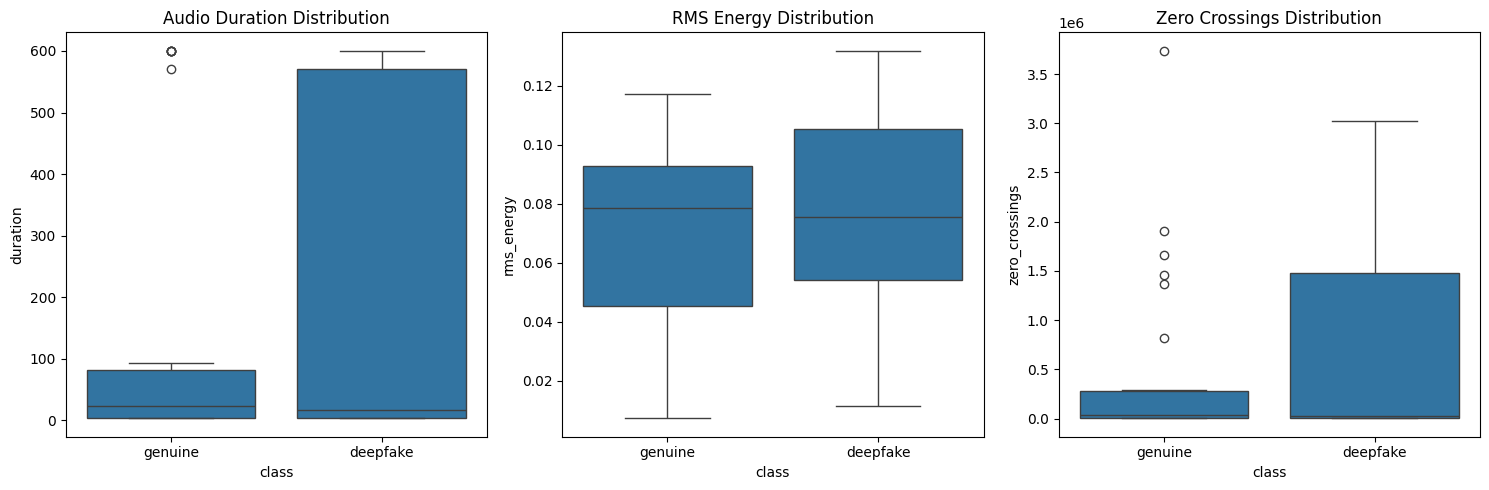

C:\Users\KARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\KARAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


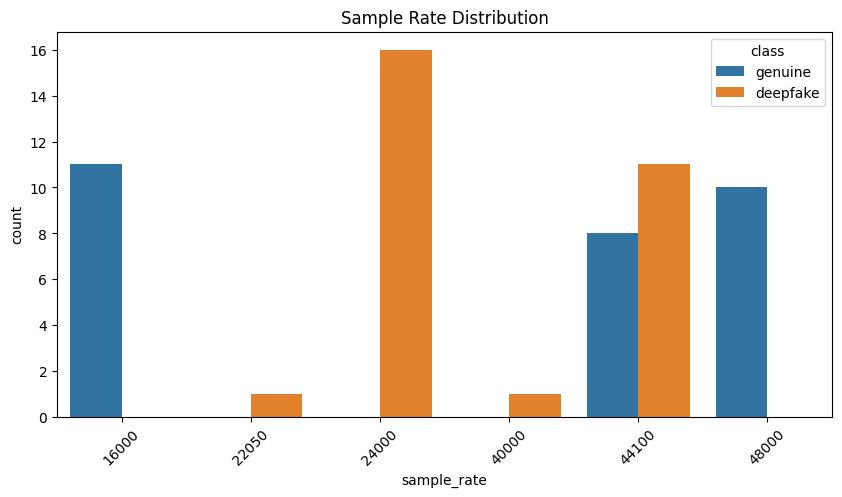

In [6]:
def plot_audio_properties(df):
    """Create visualizations for audio properties"""
    
    # 1. Duration Distribution
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    sns.boxplot(x='class', y='duration', data=df)
    plt.title('Audio Duration Distribution')
    
    plt.subplot(132)
    sns.boxplot(x='class', y='rms_energy', data=df)
    plt.title('RMS Energy Distribution')
    
    plt.subplot(133)
    sns.boxplot(x='class', y='zero_crossings', data=df)
    plt.title('Zero Crossings Distribution')
    
    plt.tight_layout()
    plt.show()

    # 2. Sample Rate Distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(x='sample_rate', hue='class', data=df)
    plt.title('Sample Rate Distribution')
    plt.xticks(rotation=45)
    plt.show()

plot_audio_properties(df)

In [7]:
## Spectral Analysis

Analyzing sample genuine audio:


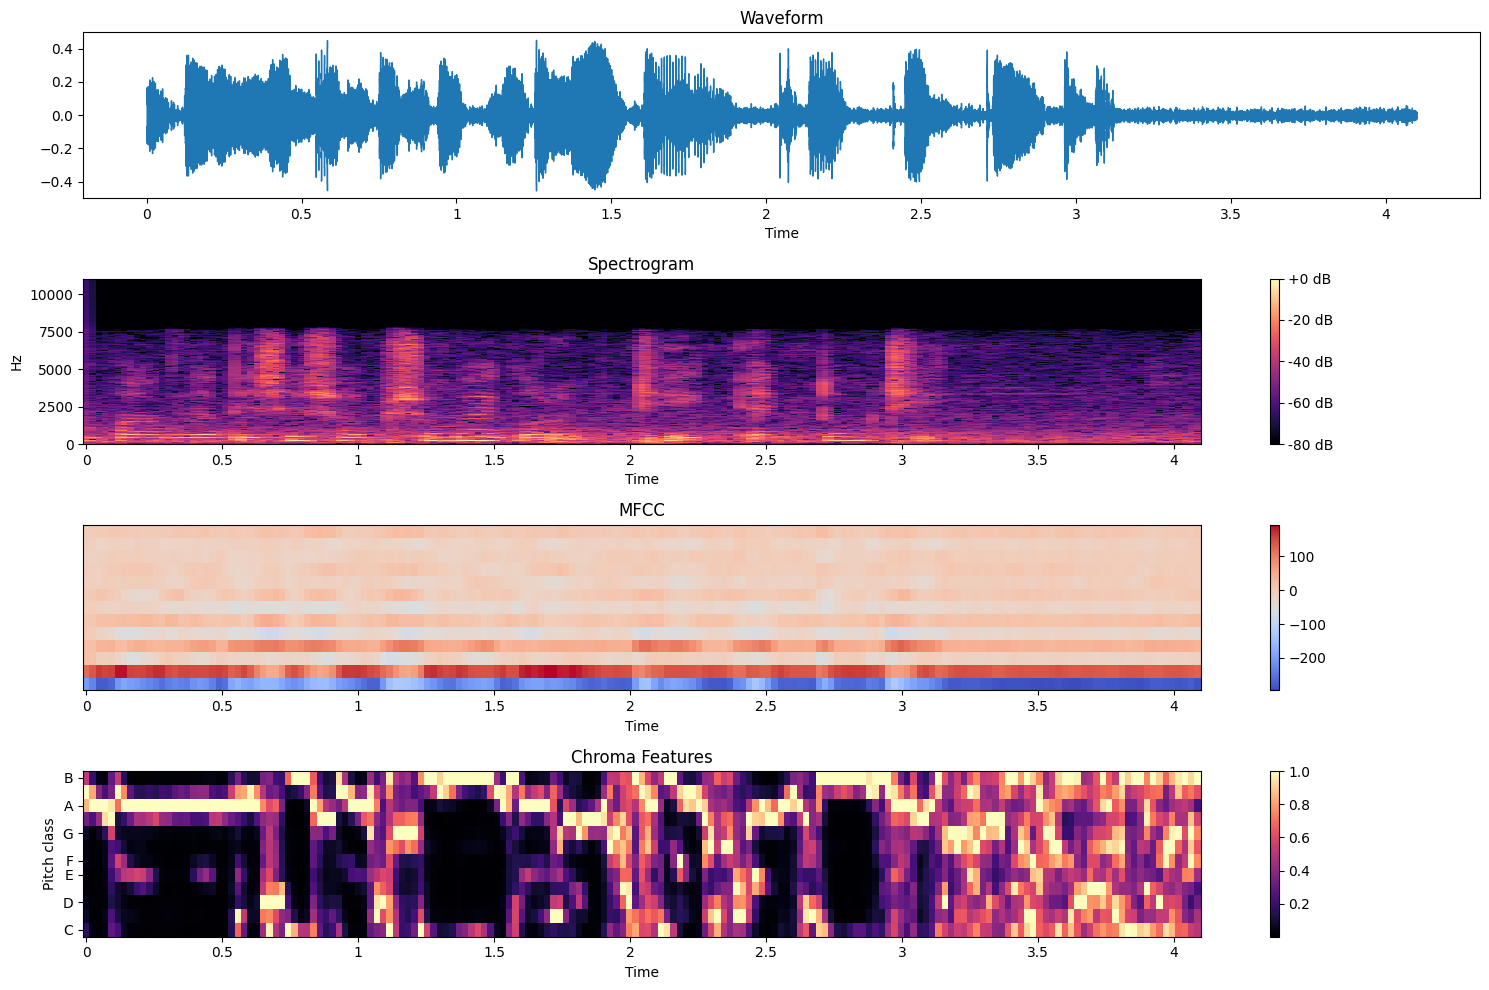


Analyzing sample deepfake audio:


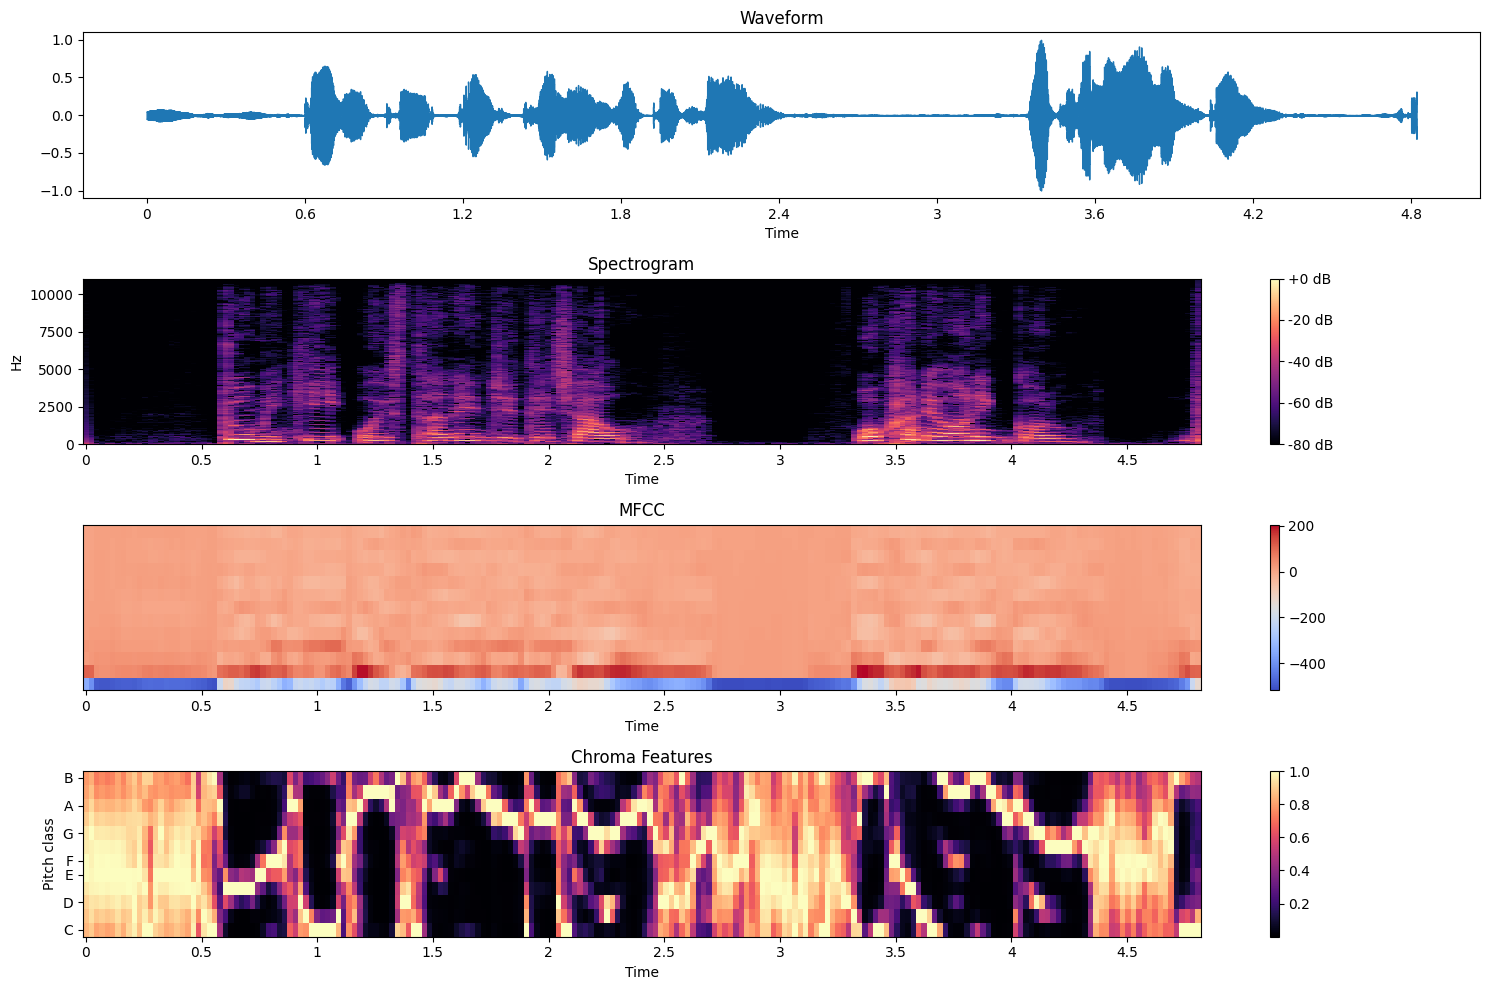

In [8]:
def analyze_spectral_features(audio_path):
    """Analyze and visualize spectral features of an audio file"""
    # Load audio
    y, sr = librosa.load(audio_path)
    
    plt.figure(figsize=(15, 10))
    
    # 1. Waveform
    plt.subplot(411)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    
    # 2. Spectrogram
    plt.subplot(412)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    
    # 3. MFCC
    plt.subplot(413)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    
    # 4. Chroma Features
    plt.subplot(414)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma Features')
    
    plt.tight_layout()
    plt.show()
    
    # Return audio player
    return Audio(y, rate=sr)

# Analyze sample files from each class
print("Analyzing sample genuine audio:")
genuine_sample = glob.glob(os.path.join(genuine_dir, "*.wav"))[0]
display(analyze_spectral_features(genuine_sample))

print("\nAnalyzing sample deepfake audio:")
deepfake_sample = glob.glob(os.path.join(deepfake_dir, "*.wav"))[0]
display(analyze_spectral_features(deepfake_sample))

In [9]:
## Statistical Analysis

In [10]:
def statistical_analysis(df):
    """Perform statistical analysis on audio features"""
    from scipy import stats
    
    features = ['duration', 'rms_energy', 'zero_crossings']
    results = []
    
    for feature in features:
        genuine_data = df[df['class'] == 'genuine'][feature]
        deepfake_data = df[df['class'] == 'deepfake'][feature]
        
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(genuine_data, deepfake_data)
        
        # Effect size (Cohen's d)
        d = (genuine_data.mean() - deepfake_data.mean()) / np.sqrt(
            (genuine_data.var() + deepfake_data.var()) / 2
        )
        
        results.append({
            'Feature': feature,
            'T-statistic': t_stat,
            'P-value': p_value,
            "Cohen's d": d
        })
    
    return pd.DataFrame(results)

# Perform statistical analysis
stats_df = statistical_analysis(df)
print("\nStatistical Analysis Results:")
print(stats_df)


Statistical Analysis Results:
          Feature  T-statistic   P-value  Cohen's d
0        duration    -1.058595  0.294329  -0.278001
1      rms_energy    -0.692014  0.491788  -0.181732
2  zero_crossings    -0.967174  0.337616  -0.253992
